# SEABORN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 한글폰트 설치
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 표시
plt.rc('font', family = 'Malgun Gothic')

In [9]:
titanic = sns.load_dataset('titanic')
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


### regression plot 회귀선 그리기

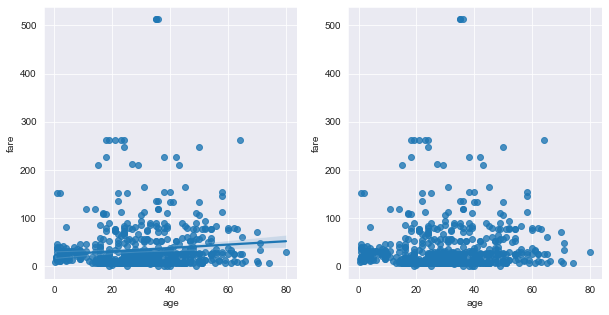

In [4]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 그래프그리기, 선형회귀선 표시
sns.regplot(x='age', y='fare', data = titanic, ax=ax1)
# 그래프그리기, 선형회귀선 미표시
sns.regplot(x='age', y='fare', data = titanic, ax=ax2, fit_reg=False)
plt.show()

### HEATMAP

<AxesSubplot:title={'center':'연도, 월별 승객수 히트맵'}, xlabel='year', ylabel='month'>

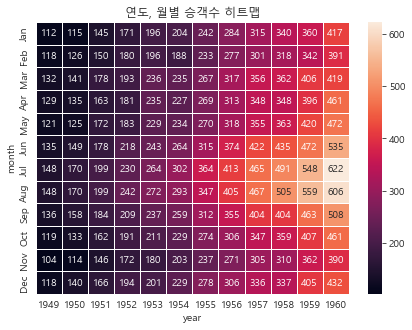

In [7]:
flights = sns.load_dataset('flights')
flights_psg = flights.pivot('month','year','passengers')

plt.figure(figsize = (7,5))
plt.title('연도, 월별 승객수 히트맵')
sns.heatmap(flights_psg, annot = True, fmt = 'd', linewidths = 1)

### Scatter plot

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


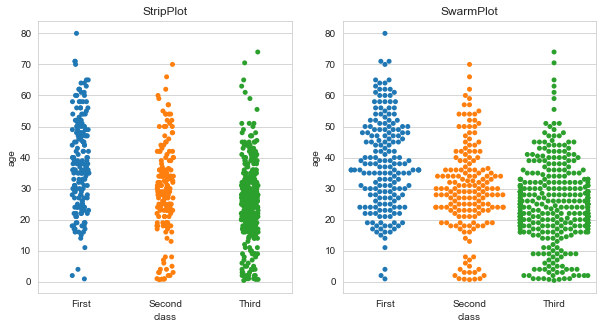

In [10]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x = 'class', y = 'age', data = titanic, ax = ax1)
# 이산형 변수의 분포 - 데이터 분산 고려 (중복X), 분산까지 표현됨
sns.swarmplot(x = 'class', y = 'age', data = titanic, ax = ax2)

ax1.set_title('StripPlot')
ax2.set_title('SwarmPlot')
plt.show()

### 바 차트

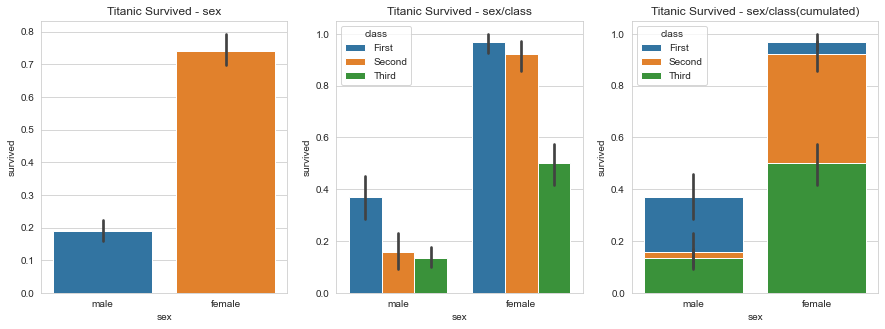

In [11]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축, y축에 변수를 할당
sns.barplot(x = 'sex', y = 'survived', data= titanic, ax = ax1)

# hue 옵션, class별로 표시
sns.barplot(x = 'sex', y = 'survived', hue = 'class', data= titanic, ax = ax2)

# hue 옵션, class별 누적으로 표시
sns.barplot(x = 'sex', y = 'survived', hue = 'class', dodge = False, data= titanic, ax = ax3)

ax1.set_title('Titanic Survived - sex')
ax2.set_title('Titanic Survived - sex/class')
ax3.set_title('Titanic Survived - sex/class(cumulated)')
plt.show()

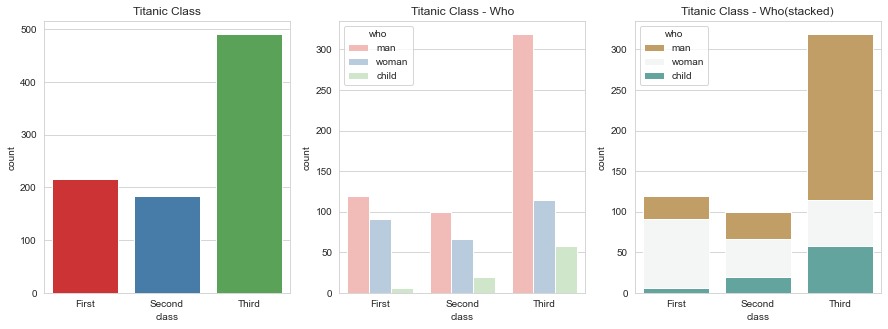

In [12]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# x축, y축에 변수를 할당
sns.countplot(x = 'class', palette = 'Set1', data= titanic, ax = ax1)   #palette는 색깔

# hue 옵션으로 who 추가(woman, man, child)
sns.countplot(x = 'class', palette = 'Pastel1', hue='who', data= titanic, ax = ax2)

# 누적으로 표시
sns.countplot(x = 'class', palette = 'BrBG', hue='who', dodge=False, data= titanic, ax = ax3)

ax1.set_title('Titanic Class')
ax2.set_title('Titanic Class - Who')
ax3.set_title('Titanic Class - Who(stacked)')
plt.show()

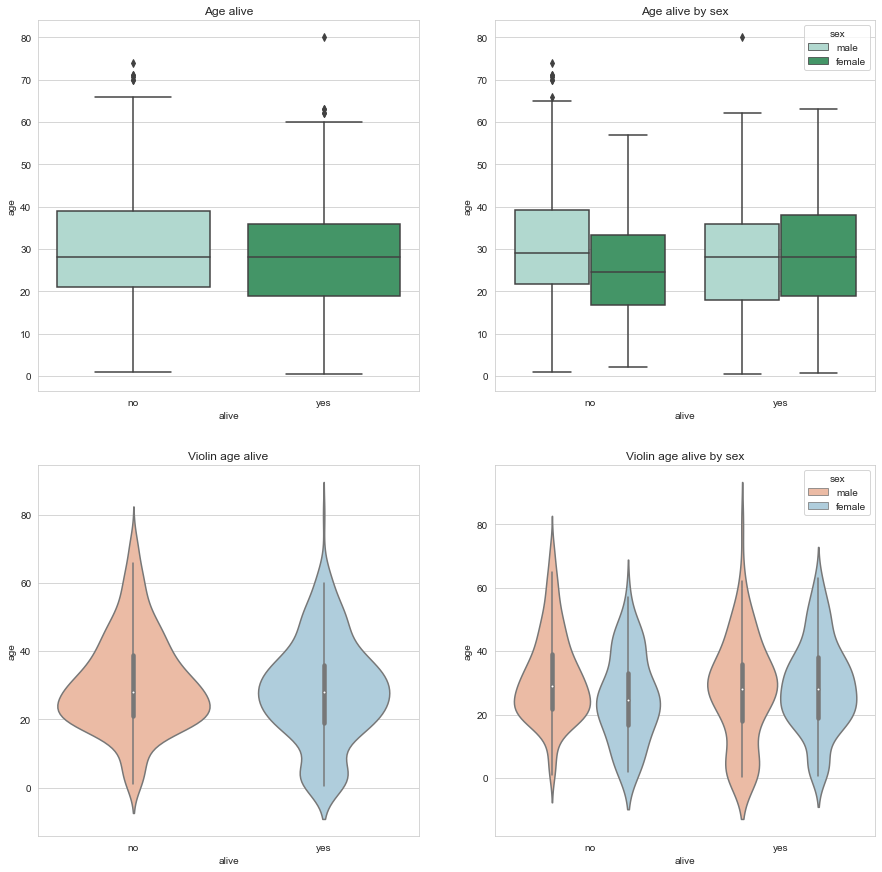

In [13]:
sns.set_style('whitegrid')

fig = plt.figure(figsize = (15,15))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# ax1에는 Boxplot 기본값
sns.boxplot(x = 'alive', y = 'age', palette = 'BuGn', data=titanic, ax= ax1)

# ax2, Boxplot hue = sex
sns.boxplot(x = 'alive', y = 'age', palette = 'BuGn', hue = 'sex', data=titanic, ax= ax2)

# ax3, Violin Graph 기본값
sns.violinplot(x = 'alive', y = 'age', palette = 'RdBu', data=titanic, ax= ax3)

# ax4, Violin Graph 기본값, hue = sex
sns.violinplot(x = 'alive', y = 'age', palette = 'RdBu', hue = 'sex', data=titanic, ax= ax4)


ax1.set_title('Age alive')
ax2.set_title('Age alive by sex')
ax3.set_title('Violin age alive')
ax4.set_title('Violin age alive by sex')
plt.show()

### Joint Plot: scatter plot + histogram

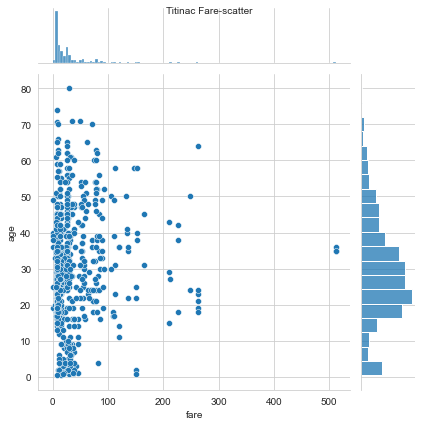

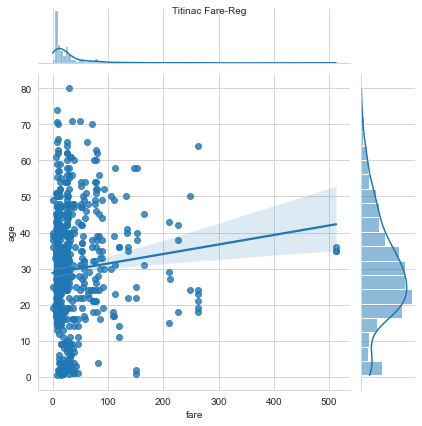

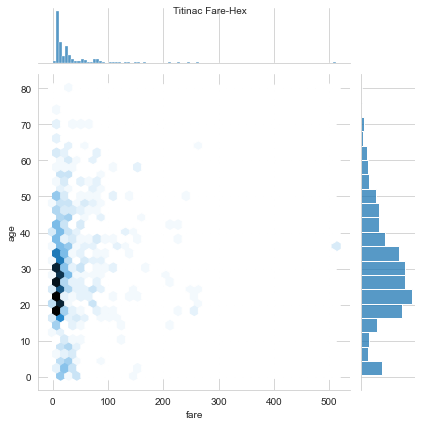

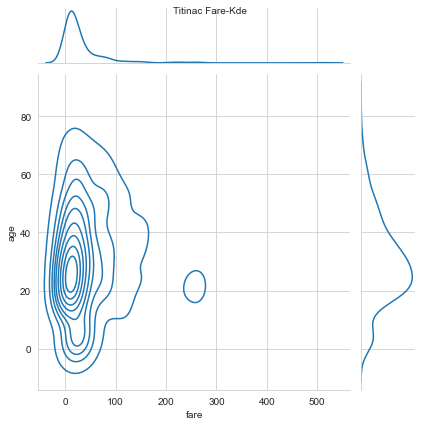

In [14]:
sns.set_style('whitegrid')

# j1 기본값
j1 = sns.jointplot(x = 'fare', y = 'age', data=titanic)

# j2 회귀선
j2 = sns.jointplot(x = 'fare', y = 'age', kind = 'reg', data=titanic)

# j3 육각그래프    #그리스 수, Hexa Hepta Octa Nona Deca..
j3 = sns.jointplot(x = 'fare', y = 'age', kind = 'hex', data=titanic)

# j4 커널 등고선? 밀집 그래프
j4 = sns.jointplot(x = 'fare', y = 'age', kind = 'kde', data=titanic)

j1.fig.suptitle('Titinac Fare-scatter', size = 10)
j2.fig.suptitle('Titinac Fare-Reg', size = 10)
j3.fig.suptitle('Titinac Fare-Hex', size = 10)
j4.fig.suptitle('Titinac Fare-Kde', size = 10)

plt.show()

### Pairplot

In [16]:
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


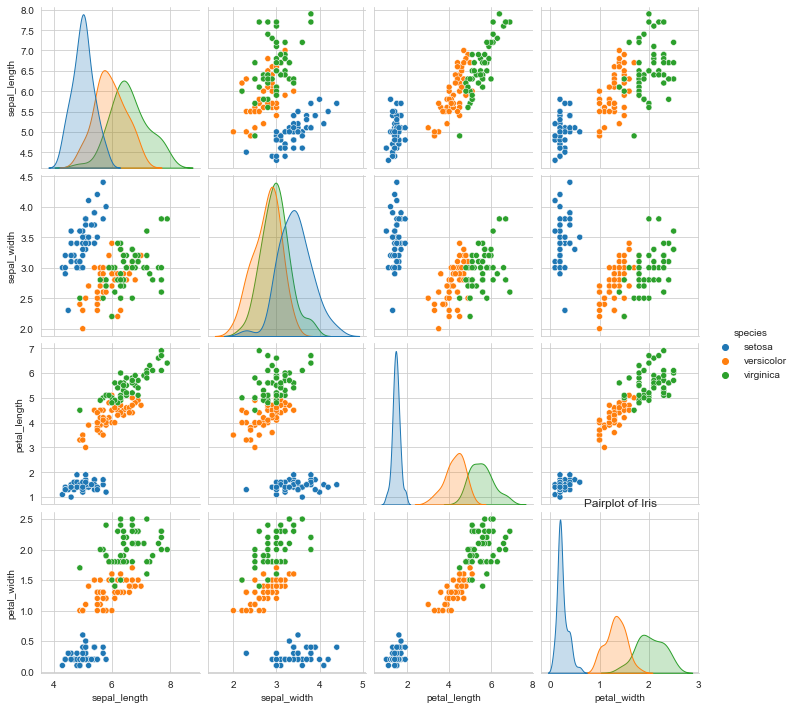

In [15]:
sns.pairplot(iris, hue = 'species')
plt.title('Pairplot of Iris')
plt.show()